## 【課題】統計基礎用語の説明
- 標準偏差について、分散との違いや関係性、どんなときに使う指標か
> 標準偏差とはデータの散らばり度合いを表す値であり、分散を平方根に取ることによって計算される。
$$ s = \sqrt{s^2} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i - \overline{x})^2} $$
>ここで、$ s^2 $は分散、nはデータの総数、$ \overline{x} $は平均値を表す。  
>分散は各データを2乗して計算するため、平均値などとは単位が異なってしまう。そのため、それらのデータとの比較や計算を行うことができない。標準偏差は、分散の平方根を取ることによって比較や計算を行えるようにしたデータの散らばり度合いの指標。
- 共分散行列について
> 共分散行列とは、対角成分に分散、非対角成分に共分散が並ぶ行列のことを指す。データの散らばりや変数同士の相関を表す。  
> 例えば、2次元のデータ{x, y}があるとすると、その共分散行列は、
$$ \Sigma = \begin{pmatrix} \sigma_{x}^2 & \sigma_{xy} \\ \sigma_{yx} & \sigma_{y}^2 \end{pmatrix} $$
> で定義される。このとき、
$$ \sigma_{x}^2 = \frac{1}{n}\sum_{i=1}^{n}(x_i - \overline{x})^2 $$
$$ \sigma_{y}^2 = \frac{1}{n}\sum_{i=1}^{n}(y_i - \overline{y})^2 $$
$$ \sigma_{xy} = \sigma_{yx} = \frac{1}{n}\sum_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y}) $$
- 1次元の正規分布と多次元の正規分布について
> 正規分布（ガウス分布）とは、平均値の付近に集積するようなデータの分布を表した連続的な変数に関する確率分布である。  
多変量正規分布とは、1次元の正規分布を多次元に一般化した確率分布である。  
変数が複数あり、それらの間に相関がある場合に用いられる。

## 【課題】データ点の作成
2次元正規分布を用いて、中心(平均)が(-3,0)と(0,-3)、共分散行列が以下で表現される確率分布から生成されるデータ点を500個ずつ作成せよ。
その際、片方の500個のデータにはdata1、もう片方の500個のデータにはdata2と名付けて作成せよ。

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
mean1 = [-3, 0]  # data1の中心
mean2 = [0, -3]  # data2の中心
cov = [[1.0, 0.8], [0.8, 1.0]]  # data1, data2のデータの共分散行列

In [10]:
# データ1、データ2の作成
data1 = np.random.multivariate_normal(mean1, cov=cov, size=500)
data2 = np.random.multivariate_normal(mean2, cov=cov, size=500)
data1.shape

(500, 2)

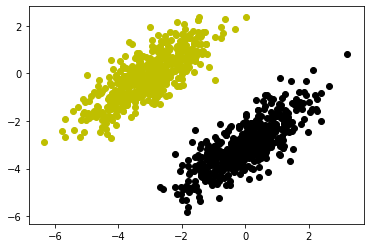

In [11]:
plt.scatter(data1[:, 0], data1[:, 1], color='y')
plt.scatter(data2[:, 0], data2[:, 1], color='k')
plt.show()

## 【課題】データ点へのラベル付け
実際に扱うデータは各データが何のグループに属しているのかラベル付けされていなければなりません。
今回は二つの確率分布からデータをサンプリングしていますので、各500個のデータに対して、2つの確率分布のうち、どちらの確率分布からサンプリングされたものなのか、ラベル付けする必要があります。
上で作成した500個×2のデータに対してラベル付けをしてください、割り当てるラベルは区別できれば何でもいいですが、ここでは簡単に0と1にしてください。

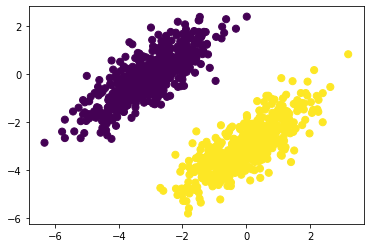

In [12]:
data1_labeled = np.hstack([data1, np.zeros((500, 1))])
data2_labeled = np.hstack([data2, np.ones((500, 1))])
data = np.vstack([data1_labeled, data2_labeled])

plt.scatter(data[:,0], data[:, 1], s=50, c=data[:,2], marker='o')
plt.show()